In [1]:
import matplotlib.pyplot as plot
import numpy as np
import pandas as pd

In [2]:
# make above code to be a function
def get_df(path):
    title = path.split("/")[-1].split(".")[0]
    stats = path.split("/")[-1].split("_")[2].split(".")[0]
    df = pd.read_csv(path)
    df = df.drop(columns=df.columns[0])
    df = df[df["Step"] % 600 == 0]
    df["epoch"] = df["Step"] / 1200
    df[stats] = df["Value"]
    df = df.drop(columns=["Step", "Value"])
    df = df.reset_index(drop=True)
    return df

In [3]:
acc_25 = get_df("./25_eval_acc.csv")
acc_50 = get_df("./50_eval_acc.csv")
acc_75 = get_df("./75_eval_acc.csv")
acc_100 = get_df("./100_eval_acc.csv")

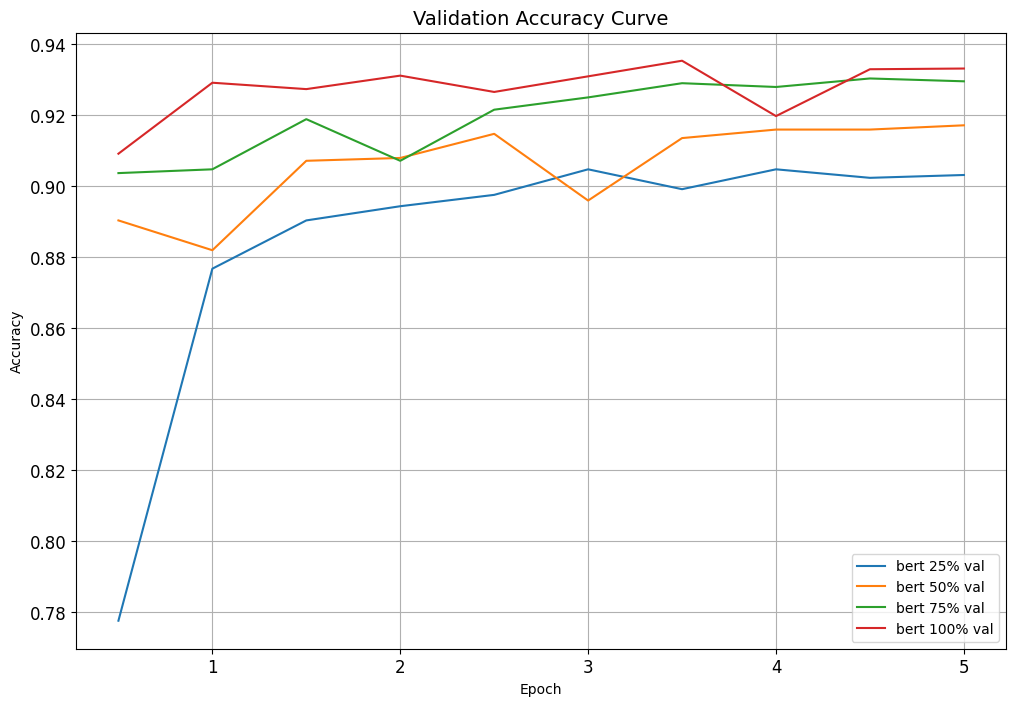

In [11]:
# plot
plot.figure(figsize=(12, 8))
# plot line
plot.plot(acc_25["epoch"], acc_25["acc"], label="bert 25% val")
plot.plot(acc_50["epoch"], acc_50["acc"], label="bert 50% val")
plot.plot(acc_75["epoch"], acc_75["acc"], label="bert 75% val")
plot.plot(acc_100["epoch"], acc_100["acc"], label="bert 100% val")
# set label
plot.xlabel("Epoch")
plot.ylabel("Accuracy")
# set ticker label fontsize
plot.xticks(fontsize=14)
plot.yticks(fontsize=14)
# title
plot.title("Validation Accuracy Curve", fontsize=14)
# set legend
plot.legend()
# set grid
plot.grid()
# set ticker label fontsize
plot.xticks(fontsize=12)
plot.yticks(fontsize=12)
# save figure and show
plot.savefig("bert_acc.png")
plot.show()

In [5]:
trainloss_25 = get_df("./25_train_loss.csv")
trainloss_50 = get_df("./50_train_loss.csv")
trainloss_75 = get_df("./75_train_loss.csv")
trainloss_100 = get_df("./100_train_loss.csv")
trainloss = [trainloss_25, trainloss_50, trainloss_75, trainloss_100]
valloss_25 = get_df("./25_eval_loss.csv")
valloss_50 = get_df("./50_eval_loss.csv")
valloss_75 = get_df("./75_eval_loss.csv")
valloss_100 = get_df("./100_eval_loss.csv")
valloss = [valloss_25, valloss_50, valloss_75, valloss_100]

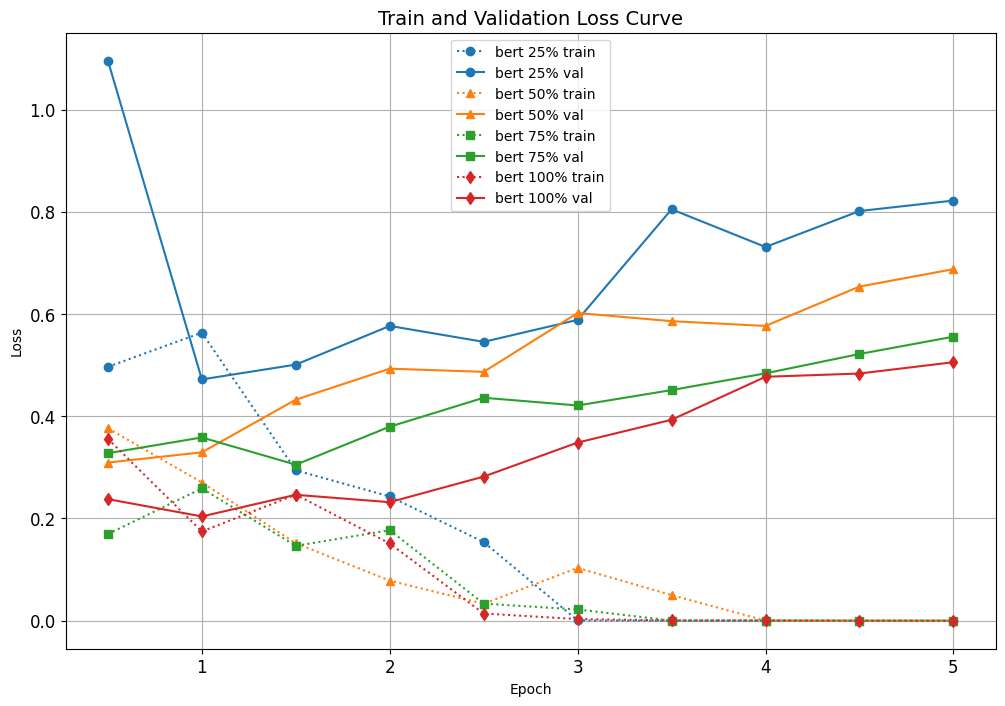

In [12]:
# plot
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
markers = ['o', '^', 's', 'd']
plot.figure(figsize=(12, 8))
for i in range(len(trainloss)):
    plot.plot(trainloss[i]["epoch"], trainloss[i]["loss"], label="bert "+str(25*(i+1))+"% "+"train", color=colors[i], marker=markers[i], linestyle='dotted')
    plot.plot(valloss[i]["epoch"], valloss[i]["loss"], label="bert "+str(25*(i+1))+"% "+"val", color=colors[i], marker=markers[i])
# set label
plot.xlabel("Epoch")
plot.ylabel("Loss")
# set ticker label fontsize
plot.xticks(fontsize=14)
plot.yticks(fontsize=14)
# title
plot.title("Train and Validation Loss Curve", fontsize=14)
# set legend
plot.legend()
# set grid
plot.grid()
# set ticker label fontsize
plot.xticks(fontsize=12)
plot.yticks(fontsize=12)
# save figure and show
plot.savefig("bert_loss.png")
plot.show()